<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/07_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5%2C_%ED%8C%8C%EC%9D%B8%ED%8A%9C%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B8%94%EB%9E%99%ED%95%91%ED%81%AC_%EB%B6%84%EB%A5%98%EA%B8%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data"
!unzip "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data/idol_face_datasets.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: HQ_512x512/HQ_512x512/30202.jpg  
  inflating: HQ_512x512/HQ_512x512/30206.jpg  
  inflating: HQ_512x512/HQ_512x512/3024.jpg  
  inflating: HQ_512x512/HQ_512x512/30252.jpg  
  inflating: HQ_512x512/HQ_512x512/30278.jpg  
  inflating: HQ_512x512/HQ_512x512/3030.jpg  
  inflating: HQ_512x512/HQ_512x512/30323.jpg  
  inflating: HQ_512x512/HQ_512x512/30324.jpg  
  inflating: HQ_512x512/HQ_512x512/30329.jpg  
  inflating: HQ_512x512/HQ_512x512/30341.jpg  
  inflating: HQ_512x512/HQ_512x512/30436.jpg  
  inflating: HQ_512x512/HQ_512x512/3044.jpg  
  inflating: HQ_512x512/HQ_512x512/3045.jpg  
  inflating: HQ_512x512/HQ_512x512/3046.jpg  
  inflating: HQ_512x512/HQ_512x512/30467.jpg  
  inflating: HQ_512x512/HQ_512x512/3057.jpg  
  inflating: HQ_512x512/HQ_512x512/3058.jpg  
  inflating: HQ_512x512/HQ_512x512/3061.jpg  
  inflating: HQ_512x512/HQ_512x512/3065.jpg  
  inflating: HQ_512x512/HQ_512x512/3066.jpg  
  inflating: HQ_512x512/HQ_512x512

In [ ]:
TRAIN_METADATA_PATH = "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data/kid_f_train.csv"
TEST_METADATA_PATH = "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data/kid_f_test.csv"

In [ ]:
TRAIN_IMAGE_DIR = "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data/HQ_512x512/HQ_512x512"
TEST_IMAGE_DIR = "/content/drive/MyDrive/한경_토스뱅크_2024/02_Deep Learning/실습코드/03_Computer Vision/data/test_final_with_degrad/test"

# 데이터 로딩 및 메타데이터 세트 구축

In [ ]:
import pandas as pd

df_train = pd.read_csv(TRAIN_METADATA_PATH)
df_test  = pd.read_csv(TEST_METADATA_PATH)

In [ ]:
df_train.head()

,file_name,name
0,5.jpg,yujin
1,8.jpg,yujin
2,17.jpg,yujin
3,23.jpg,yujin
4,26.jpg,yujin


In [ ]:
df_test.head()

,file_name,name
0,45.jpg,yujin
1,67.jpg,iu
2,85.jpg,winter
3,96.jpg,winter
4,112.jpg,winter


In [ ]:
df_train['name'].value_counts()

,count
name,
lisa,1282
rose,1245
jisoo,1023
jennie,414
kimminju,261
joyuri,257
choiyena,135
kimchaewon,119
hondahitomi,119


In [ ]:
# name의 value_counts()가 400개 이상인 데이터만 사용
df_train = df_train[df_train['name'].isin(df_train['name'].value_counts()[df_train['name'].value_counts() >= 400].index)]
df_train['name'].value_counts()

,count
name,
lisa,1282
rose,1245
jisoo,1023
jennie,414


In [ ]:
# name을 이용해 Label Encoding
df_train['target'] = df_train['name'].astype('category').cat.codes
df_train.head()

,file_name,name,target
1481,7085.jpg,jisoo,1
1482,7091.jpg,jisoo,1
1483,7104.jpg,jisoo,1
1484,7107.jpg,jisoo,1
1485,7122.jpg,jisoo,1


In [ ]:
df_train['target'] = df_train['target'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3964 entries, 1481 to 5590
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3964 non-null   object
 1   name       3964 non-null   object
 2   target     3964 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.9+ KB


In [ ]:
# name_to_target
name_to_target = dict(zip(df_train['name'], df_train['target']))
name_to_target

{'jisoo': 1, 'jennie': 0, 'rose': 3, 'lisa': 2}

In [ ]:
# target_to_name
target_to_name = dict(zip(df_train['target'], df_train['name']))
target_to_name

{1: 'jisoo', 0: 'jennie', 3: 'rose', 2: 'lisa'}

# 파이토치 데이터 로더 구성

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df_train,
    test_size=0.2,
    random_state=42,
    stratify=df_train['target']
)

In [ ]:
# Pandas 데이터 프레임 기반 파이토치 데이터 세트
import torch
import os
from PIL import Image
from torch.utils.data import Dataset

class IdolDataset(Dataset):

  def __init__(self, dataframe, img_dir, transform=None):
    super().__init__()

    self.dataframe = dataframe
    self.img_dir = img_dir
    self.transform = transform

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    # 데이터프레임에서 이미지 파일 경로, 레이블 추출
    img_name = os.path.join(self.img_dir, self.dataframe.iloc[idx, 0])
    label = self.dataframe.iloc[idx, 2]

    # 이미지 로드 및 변환
    image = Image.open(img_name)

    if self.transform:
      image = self.transform(image)

    # 레이블을 텐서로 변환
    label = torch.tensor(label)

    return image, label

In [ ]:
# 데이터 로더 구성
from torchvision import transforms

transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406),
                           (0.229, 0.224, 0.225))]
)

In [ ]:
from torch.utils.data import DataLoader

# 데이터 세트 정의
train_dataset = IdolDataset(dataframe=train_df, img_dir=TRAIN_IMAGE_DIR, transform=transform)
valid_dataset = IdolDataset(dataframe=val_df, img_dir=TRAIN_IMAGE_DIR, transform=transform)

# 데이터 로더 정의
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(valid_dataset, batch_size=32, shuffle=False)

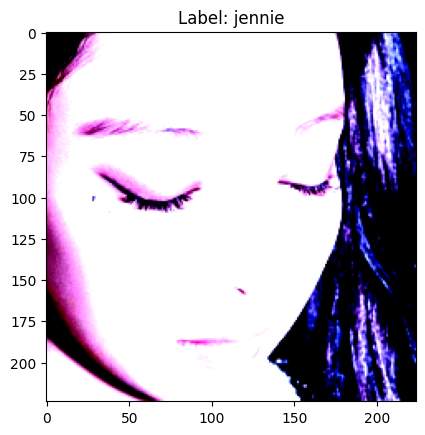

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_batch = next(iter(train_loader))
for image, label in zip(*sample_batch):
    image = image.numpy().transpose((1, 2, 0))
    plt.title(f"Label: {target_to_name[label.item()]}")
    plt.imshow(image)

# 모델 훈련 준비

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# 훈련 루프 정의
def train_loop(dataloader, model, loss_fn, optimizer):

  # 데이터 로더에 있는 데이터 세트의 길이 가져오기
  size = len(dataloader.dataset)
  model.train() # 모델을 훈련 모드로 설정
  for batch, (X, y) in enumerate(dataloader):

    # 데이터 로더에 들어있던 텐서들을 gpu로 옮기기
    X, y = X.to(device), y.to(device)

    # 예측 및 손실 확인
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파 수행(미분)
    optimizer.zero_grad() # 기존에 남아있던 gradient 제거( 이전 배치의 기울기를 반영하지 않게 하기 위해)
    loss.backward() # 역전파
    optimizer.step()

    # 배치가 100번 돌 때마다 화면에 출력
    if batch % 10 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"Train Loss : {loss:>7f} [ {current:>5d} / {size:>5d} ]")

In [ ]:
# 추론 루프 정의
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)

  test_loss, correct = 0, 0
  model.eval() # 모델을 추론모드로 설정
  # 추론 과정은 기울기를 구하지 않음
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  num_batches = len(dataloader)

  # 배치 별 loss값의 평균 구하기
  test_loss /= num_batches
  correct /= size

  print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg Loss : {test_loss:>8f}\n")

# 모델 직접 정의

In [ ]:
from torch import nn

class CNN_deep(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(3, 32, 3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(),
      nn.Conv2d(32, 32, 3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU()
    )
    self.Maxpool1 = nn.MaxPool2d(2)

    self.conv_block2 = nn.Sequential(
      nn.Conv2d(32, 64, 3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.Conv2d(64, 64, 3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.Conv2d(64, 64, 3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU()
    )
    self.Maxpool2 = nn.MaxPool2d(2)

    self.conv_block3 = nn.Sequential(
      nn.Conv2d(64, 128, 3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(),
      nn.Conv2d(128, 128, 3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(),
      nn.Conv2d(128, 128, 3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU()
    )
    self.Maxpool3 = nn.MaxPool2d(2)

    self.classifier = nn.Sequential(

      # 224/2/2/2 * 224/2/2/2 * 128
      nn.Linear(100352, 512),
      nn.ReLU(),
      nn.Linear(512, 4)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.Maxpool1(x)
    x = self.conv_block2(x)
    x = self.Maxpool2(x)
    x = self.conv_block3(x)
    x = self.Maxpool3(x)
    x = torch.flatten(x, start_dim=1)
    x = self.classifier(x)
    return x

In [ ]:
model = CNN_deep().to(device)
print(model)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 학습 수행
epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}\n........................")
  train_loop(train_loader, model, loss_fn, optimizer)
  test_loop(val_loader, model, loss_fn)

print("Done!")

Epoch 1
........................
Train Loss : 1.418244 [     0 /  3171 ]
Train Loss : 2.632410 [   320 /  3171 ]
Train Loss : 1.110835 [   640 /  3171 ]
Train Loss : 1.483333 [   960 /  3171 ]
Train Loss : 1.061979 [  1280 /  3171 ]
Train Loss : 0.932087 [  1600 /  3171 ]


KeyboardInterrupt: 

# 전이학습

## VGG 모델 전이학습

In [ ]:
from torchvision import models

# 1000개의 이미지넷 분류를 하도록 훈련된 VGG 19 모델 로딩
model = models.vgg19(weights="IMAGENET1K_V1")
print(model)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 174MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# 이미 학습된 파라미터가 다시 훈련되지 않도록 얼려주기(freeze)
for param in model.parameters(): # 모델에 있는 모든 가중치, 편향 가지고 오기
  param.requires_grad = False # 가중치 업데이트 하지 않기

In [ ]:
# 마지막 출력층 교체 전
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
# 인덱스 6번 레이어(출력층) 교체
model.classifier[6] = nn.Linear(in_features = 4096, out_features = 4)
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=4, bias=True)
)

In [ ]:
# 마지막 레이어만 requires_grad = True로 설정하여 학습 가능하게 함
for param in model.classifier[6].parameters():
  param.requires_grad = True

In [ ]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 학습 수행
epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}\n........................")
  train_loop(train_loader, model, loss_fn, optimizer)
  test_loop(val_loader, model, loss_fn)

print("Done!")

Epoch 1
........................
Train Loss : 1.516338 [     0 /  3171 ]
Train Loss : 1.332352 [   320 /  3171 ]


KeyboardInterrupt: 

## ResNet 모델 전이학습

In [ ]:
model = models.resnet50(weights="IMAGENET1K_V1").to(device)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 파라미터 학습되지 않도록 얼리기
for param in model.parameters():
  param.requires_grad = False

In [ ]:
# 마지막 출력층 레이어 교체
model.fc = nn.Linear(in_features=2048, out_features=4, bias=True)
model.fc

Linear(in_features=2048, out_features=4, bias=True)

In [ ]:
# 마지막 레이어만 훈련 가능하도록 설정
for param in model.fc.parameters():
  param.requires_grad = True

# ResNet 일부 레이어(마지막 레이어만) 파인튜닝
- 데이터셋이 크지 않거나, 새로운 작업이 사전 학습된 작업과 유사할 때 유용합니다.
- 모델의 하위 레이어(초기 Conv 레이어들)는 보통 일반적인 특징(예: 가장자리, 패턴)을 학습하므로, 이 부분은 고정하고, 상위 레이어만 학습시켜도 좋은 성능을 얻을 수 있습니다.

In [ ]:
model = models.resnet50(weights="IMAGENET1K_V1").to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
  param.requires_grad = False

# FE의 마지막층인 layer4의 파라미터만 훈련 가능하도록 설정
for param in model.layer4.parameters():
  param.requires_grad = True

In [ ]:
# 마지막 출력층 레이어 추가(DownStream Task)
model.fc = nn.Linear(in_features=2048, out_features=4)

for param in model.fc.parameters():
  param.requires_grad = True

# ResNet 모든 레이어 파인튜닝
- 큰 데이터셋을 가지고 있고, 사전 학습된 모델의 모든 계층이 새로운 작업에 맞게 조정되기를 원할 때 사용합니다.
- 사전 학습된 모델이 새로운 작업과 충분히 다르다고 판단될 때 유용합니다.
- 모델의 모든 레이어의 requires_grad를 True로 설정하여 학습 가능하게 합니다.
- 이 접근 방식은 시간이 오래 걸리고 많은 계산 자원을 필요로 할 수 있습니다.

In [ ]:
# 이미지넷의 태스크를 훈련한 모델을 그대로 가져와서 모든 파라마티러를 파인튜닝
model = models.resnet50(weights="IMAGENET1K_V1").to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.fc = nn.Linear(in_features=2048, out_features=4)

# 모든 레이어의 requires_grad = True로 설정하여 학습이 가능하게 한다.
for param in model.parameters():
  param.requires_grad = True